In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%2.2f' % float(height),
                ha='center', va='bottom')

Simple Plots in Python

In this tutorial we'll show you some basic templates of scientific plots using Python matplotlib.

# Bar graphs with standard error bars for 1 group

    gender    scores
0      1.0  0.837683
1      1.0  0.963471
2      1.0  0.924203
3      1.0  0.439242
4      1.0  0.570559
5      1.0  0.332798
6      1.0  0.217023
7      1.0  0.889731
8      1.0  0.025183
9      1.0  0.516506
10     0.0  1.679866
11     0.0  1.006089
12     0.0  1.369671
13     0.0  1.267405
14     0.0  1.991019
15     0.0  1.561068
16     0.0  1.966447
17     0.0  1.153763
18     0.0  1.467172
19     0.0  1.222426


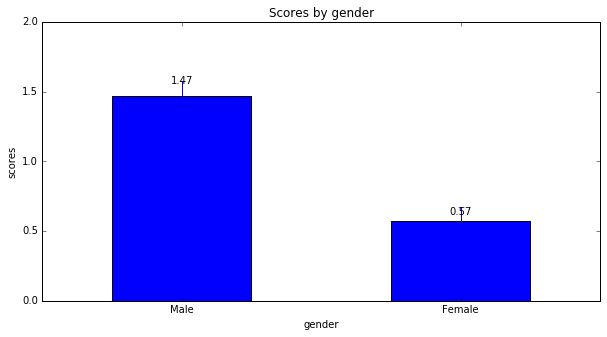

In [2]:
# based on http://matplotlib.org/examples/api/barchart_demo.html

# Make some fake data
d = {'gender': np.hstack([np.ones(10), np.zeros(10)]), 'scores': np.hstack([np.random.rand(10), np.random.rand(10)+1])}
df = pd.DataFrame(d)
print df
# Get means for each group
means = df[['gender','scores']].groupby(['gender']).mean().squeeze()
# Get standard error of means for each group
sems = df[['gender','scores']].groupby(['gender']).sem().squeeze()

fig,ax = plt.subplots(figsize=(10,5)) # Change figure size in (width,height)
ind = np.array([0.,1.]) # location of bars
width = .5 # Width of bars
# (bar x-location, bar heights, width=bar width, color=bar color, yerr=standard error)
rects1 = ax.bar(ind - width/2,means,width=.5,color='blue',yerr=sems) 

# configure axes properties to make pretty
ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Scores by gender')
ax.set_xticks(ind)
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([-.5,1.5]) 
ax.set_ylim([0,2])

# This part calls the function autolabel() defined above, and labels the bars with values
autolabel(rects1)

plt.show()

# Bar graphs with standard error bars for 2 group

    gender  race    scores
0      1.0   1.0  0.164456
1      1.0   0.0  0.970307
2      1.0   0.0  0.493683
3      1.0   0.0  0.215519
4      1.0   1.0  0.469605
5      1.0   1.0  0.575854
6      1.0   0.0  0.969365
7      1.0   0.0  0.750437
8      1.0   1.0  0.995231
9      1.0   0.0  0.395764
10     0.0   1.0  1.922203
11     0.0   0.0  1.347477
12     0.0   1.0  1.079707
13     0.0   1.0  1.299647
14     0.0   1.0  1.035214
15     0.0   0.0  1.854037
16     0.0   1.0  1.039735
17     0.0   0.0  1.879332
18     0.0   1.0  1.949631
19     0.0   0.0  1.919745


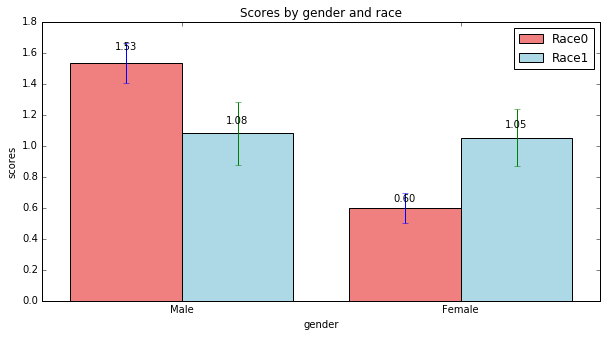

In [3]:
# Make some fake data
d = {'race': np.random.permutation(np.hstack([np.ones(10), np.zeros(10)])), 
     'gender': np.hstack([np.ones(10), np.zeros(10)]), 
     'scores': np.hstack([np.random.rand(10), np.random.rand(10)+1])}
df = pd.DataFrame(d)
print df

# Get means and sems for Gender group
means1 = df[['gender','scores']].groupby(['gender']).mean().squeeze()
sems1 = df[['gender','scores']].groupby(['gender']).sem().squeeze()
# Get means and sems for Race group
means2 = df[['race','scores']].groupby(['race']).mean().squeeze()
sems2 = df[['race','scores']].groupby(['race']).sem().squeeze()

fig,ax = plt.subplots(figsize=(10,5)) # Change figure size in (width,height)
ind = np.array([0.,1.]) # location of bars
width = .4 # Width of bars

# plot score by gender
rects1 = ax.bar(ind - width,means1,width,color='lightcoral',yerr=sems1) # (bar x-location, bar heights, width=bar width, color=bar color, yerr=standard error)
# plot score by race 
rects2 = ax.bar(ind,means2,width,color='lightblue',yerr=sems2)


# configure axes properties to make pretty
ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Scores by gender and race')
ax.set_xticks(ind)
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([ind[0]-width*1.25,ind[-1]+width*1.25]) 
ax.set_ylim([0,1.8])

ax.legend(['Race0','Race1'])

autolabel(rects1)
autolabel(rects2)


# Scatterplots of 1 group with jittered location

If you try to plot something like a scaled data, you won't be able to see how clustered they are because they would just plot on top of each other. One way to avoid this is to jitter the x,y locations around the actual value.

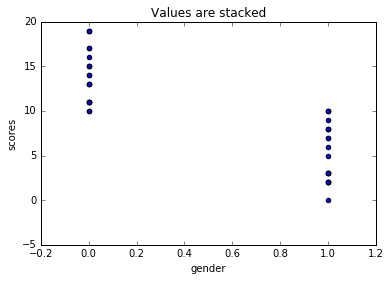

In [4]:
# Make some fake data
d = {'race': np.random.permutation(np.hstack([np.ones(20), np.zeros(20)])),
     'gender': np.hstack([np.ones(20), np.zeros(20)]), 
     'scores': np.round(10*np.hstack([np.random.rand(20), np.random.rand(20)+1]))}
df = pd.DataFrame(d)
ax = df.plot(kind='scatter',x='gender',y='scores')
ax.set_title('Values are stacked')
plt.show()

Here is the fix. 

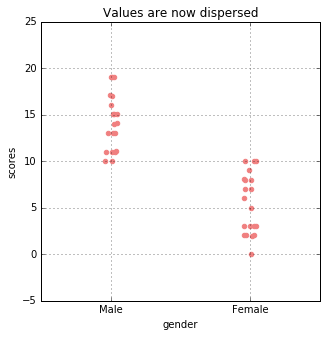

In [11]:
# Set x,y values for each group
gender0 = 0 # value of first group
y0 = df[['scores']].loc[df['gender']==gender0].values.squeeze()
y0 = y0+np.random.rand(len(y0))*.1 #Change after + sign to control dispersion
x0 = np.ones(len(y0))*gender0 +(np.random.rand(len(y0))-.5)*.1 #Change after + sign to control dispersion

gender1 = 1 # value of second group
y1 = df[['scores']].loc[df['gender']==gender1].values.squeeze()
y1 = y1+np.random.rand(len(y1))*.1
x1 = np.ones(len(y1))*gender1 + (np.random.rand(len(y1))-.5)*.1

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x0,y0,color='lightcoral')
ax.scatter(x1,y1,color='lightcoral')
ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Values are now dispersed')
ax.set_xticks([0,1])
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([-.5,1.5]) 
ax.grid() # puts grid on
plt.show()

# Drawing trend line on a scatterplot

In [13]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [14]:
d = {'race': np.random.permutation(np.hstack([np.ones(20), np.zeros(20)])),
     'gender': np.hstack([np.ones(20), np.zeros(20)]), 
     'scores': np.round(10*np.hstack([np.random.rand(20), np.random.rand(20)+1]))}
df = pd.DataFrame(d)
lm = smf.ols(formula = "scores ~ gender",data=df).fit()
print lm.summary()

# Save the slope for gender to b1 and intercept to b0
b1 = lm.params[1] 
b0 = lm.params[0]

                            OLS Regression Results                            
Dep. Variable:                 scores   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 25 May 2016   Prob (F-statistic):           8.05e-14
Time:                        11:23:35   Log-Likelihood:                -92.350
No. Observations:                  40   AIC:                             188.7
Df Residuals:                      38   BIC:                             192.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.3500      0.559     25.692      0.0

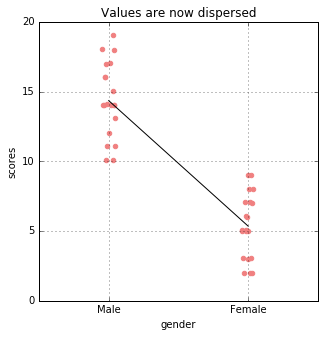

In [17]:
# Set x,y values for each group
gender0 = 0 # value of first group
y0 = df[['scores']].loc[df['gender']==gender0].values.squeeze()
y0 = y0+np.random.rand(len(y0))*.1 #Change after + sign to control dispersion
x0 = np.ones(len(y0))*gender0 + (np.random.rand(len(y0))-.5)*.1 #Change after + sign to control dispersion

gender1 = 1 # value of second group
y1 = df[['scores']].loc[df['gender']==gender1].values.squeeze()
y1 = y1+np.random.rand(len(y1))*.1
x1 = np.ones(len(y1))*gender1 + (np.random.rand(len(y1))-.5)*.1

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x0,y0,color='lightcoral')
ax.scatter(x1,y1,color='lightcoral')

# Part that adds the line
spacing = 10
minx = df[['gender']].min().squeeze()
maxx = df[['gender']].max().squeeze()
lx = np.linspace(minx,maxx,spacing) # make x coordinates 
ly = b0+lx*b1 # Estimate the y values using betas
ax.plot(lx,ly,'-k')

ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Values are now dispersed')
ax.set_xticks([0,1])
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([-.5,1.5]) 
ax.grid()
plt.show()